In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Jacobian(f, a, b, x): 
    eps = 1e-6
    grad_a = (f(a + eps, b, x) - f(a -eps, b, x)) / (2*eps)
    grad_b = (f(a, b + eps, x) - f(a, b -eps, x)) / (2*eps)
    return np.column_stack([grad_a, grad_b])

In [3]:
def Gauss_Newton(f, x, y, a0, b0, tol, max_inter):
    old = new = np.array([a0, b0])
    for itr in range(max_iter):
        old = new
        J = Jacobian(f, old[0], old[1], x)
        dy = y - f(old[0], old[1], x)
        new = old + np.linalg.inv(J.T@J)@J.T@dy
        if np.linalg.norm(old - new) < tol:
            break
    return new

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(r"D:\Dataset\HaNoi.csv")

In [6]:
df.head

<bound method NDFrame.head of       Unnamed: 0       date  pm25  pm10  o3  no2  so2  co  AQI
0              1   1/1/2014    95   124  22   40    6  28  124
1              2   1/2/2014   186   144  69   39    8  43  186
2              3   1/3/2014   227   151  24   25   12  28  227
3              4   1/4/2014   253    48  13   19   12  14  253
4              5   1/5/2014    95   115  65   35    5  33  115
...          ...        ...   ...   ...  ..  ...  ...  ..  ...
2774        2775  3/21/2024   130    72  13    1    8   8  130
2775        2776  3/22/2024   112    56   9    1    8   5  112
2776        2777  3/23/2024    76    54  11    1    7   6   76
2777        2778  3/24/2024    72    53  11    1    7   7   72
2778        2779  3/25/2024    73    48  13   19   12  14   73

[2779 rows x 9 columns]>

In [7]:
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into training and test sets
train_df = df[(df['date'] >= '2019-03-01') & (df['date'] <= '2024-03-01')]
test_df = df[df['date'] > '2024-03-01']

# Now 'train_df' holds the training set and 'test_df' holds the test set


In [8]:
train_df

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
1060,1061,2019-05-03,65,37,13,18,13,12,65
1061,1062,2019-05-04,65,37,17,18,13,12,65
1062,1063,2019-05-05,65,37,71,18,13,12,71
1063,1064,2019-05-06,65,37,24,18,13,12,65
1064,1065,2019-05-07,65,37,56,18,13,12,65
...,...,...,...,...,...,...,...,...,...
2750,2751,2024-02-26,62,26,6,3,8,4,62
2751,2752,2024-02-27,47,43,5,3,8,6,47
2752,2753,2024-02-28,86,29,9,2,8,4,86
2753,2754,2024-02-29,55,27,11,3,8,5,55


In [9]:
X_train = train_df['Unnamed: 0']
y_train =  train_df['AQI']

X_test = test_df["Unnamed: 0"]
y_test = test_df["AQI"]

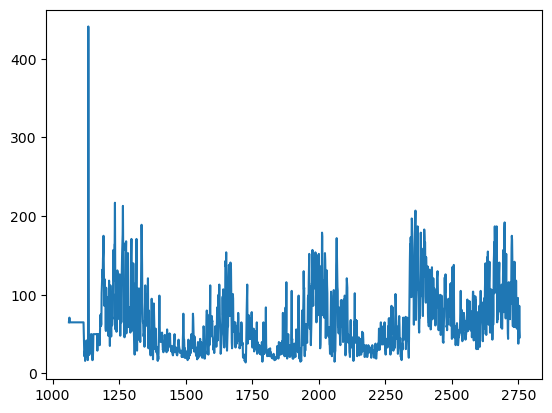

In [10]:
plt.plot(X_train, y_train)

In [11]:
# Example non-linear model function f(a, b, x)
def f(a, b, x):
    return a * np.sin(b * x)  # Replace with your actual non-linear model

a0 = 1.0
b0 = 1.0
tol = 1e-6
max_iter = 100

# Perform the Gauss-Newton optimization
estimated_parameters = Gauss_Newton(f, X_train, y_train, a0, b0, tol, max_iter)

print("Estimated parameters:", estimated_parameters)


Estimated parameters: [1.65067141 1.00004781]


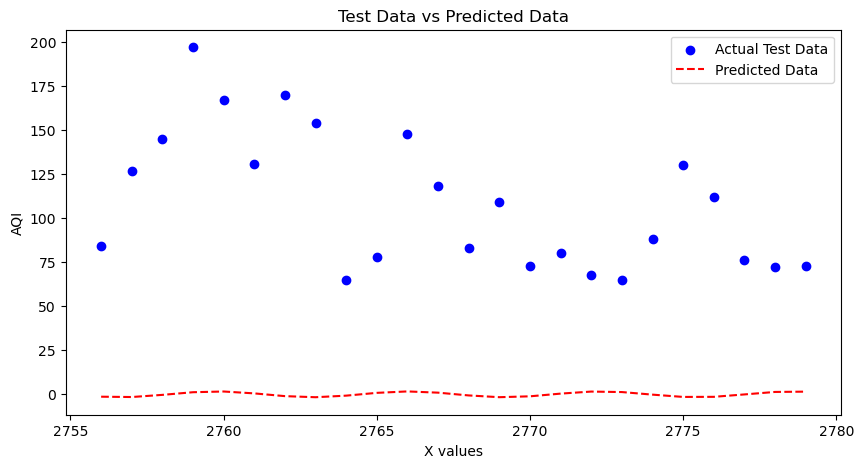

In [13]:
# Assuming 'Gauss_Newton' function returns parameters 'a' and 'b'
a_est, b_est = estimated_parameters

# Generate predictions using the estimated parameters
y_pred = f(a_est, b_est, X_test)

# Plot the test data
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')

# Plot the predicted data
plt.plot(X_test, y_pred, color='red', linestyle='--', label='Predicted Data')

# Add title and labels
plt.title('Test Data vs Predicted Data')
plt.xlabel('X values')
plt.ylabel('AQI')
plt.legend()

# Show the plot
plt.show()
